<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 10.2: CNN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- A guide you are encouraged to read through is TensorFlow's own tutorial for image classification, which can be found [here](https://www.tensorflow.org/tutorials/images/cnn)

# CIFAR10 small image classification
- [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset of color training images, labeled over 10 categories.

It has the classes:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

# Import libraries

In [33]:
# Uncomment the statements below if there are problems with TensorFlow on macOS
# import os
# os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras


In [35]:
# Uncomment the statement below to allow online monitoring with TensorBoard (need to be installed)
# from keras.callbacks import TensorBoard

# Load data
Use the **Keras**' load method.

In [36]:
import pickle
with open('..\Data\cifar-10-batches-py\data_batch_1', 'rb') as con:
    data = pickle.load(con, encoding='bytes')


## Check some data

In [37]:
#Checking the data format:

data.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

Data values:

In [38]:
#Data is 10,000 rows (each a picture)
#Pictures are 32x32 = 1024 pixels, with 1024 each for red, blue and green values

X = data[b'data']

X.shape

(10000, 3072)

Target values:


In [39]:
#10,000 values for label of image

y = np.array(data[b'labels'])
y.shape

(10000,)

In [40]:
#There are 10 different labels for y (cat, dog, etc.):

np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Prepare data

In [41]:
#One-hot encode the target variable y:

from keras.utils import to_categorical

y = to_categorical(y)

y.shape

(10000, 10)

In [42]:
#Split data:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create the model's architecture
- **NOTE ALERT**: Take into account the volume of data and parameters. Time and processing escalate quite fast.
- **NOTE ALERT**: It is likely this data will require more complex models.

In [43]:
#Reshape training data:

X_train = X_train.reshape(-1,32,32,3)

print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)

X_train shape: (7500, 32, 32, 3)
y_train shape: (7500, 10)


In [95]:
model = keras.Sequential()

#Stage 1
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (2,2), activation = 'relu', 
                              input_shape = (32,32,3),
                              kernel_regularizer = keras.regularizers.l2(l2=0.01))) 
model.add(keras.layers.Dropout(0.4)) #Preventing overfitting


model.add(keras.layers.Conv2D(filters = 32, kernel_size = (2,2), activation = 'relu', 
                              
                              kernel_regularizer = keras.regularizers.l2(l2=0.01))) 
model.add(keras.layers.Dropout(0.4))


#Stage 2
model.add(keras.layers.Conv2D(filters = 64, kernel_size = (2,2), activation = 'relu',                
                              kernel_regularizer = keras.regularizers.l2(l2=0.01)))
model.add(keras.layers.Dropout(0.4)) 

model.add(keras.layers.Conv2D(filters = 64, kernel_size = (2,2), activation = 'relu',            
                              kernel_regularizer = keras.regularizers.l2(l2=0.01)))
model.add(keras.layers.Dropout(0.4)) 

#Stage 3
model.add(keras.layers.Conv2D(filters = 128, kernel_size = (2,2), activation = 'relu', 
                              kernel_regularizer = keras.regularizers.l2(l2=0.01)))

model.add(keras.layers.Conv2D(filters = 128, kernel_size = (2,2), activation = 'relu', 
                              kernel_regularizer = keras.regularizers.l2(l2=0.01)))

model.add(keras.layers.Conv2D(filters = 128, kernel_size = (2,2), activation = 'relu', 
                              kernel_regularizer = keras.regularizers.l2(l2=0.01)))

model.add(keras.layers.MaxPooling2D((2,2)))



#Flatten outputs
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2)) 
#Last layer
model.add(keras.layers.Dense(units = 10, activation = 'softmax'))

## Compile the model

In [96]:
model.compile(optimizer = 'Adam',
              loss = 'CategoricalCrossentropy',
              metrics = ['accuracy'])

In [97]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_129 (Conv2D)          (None, 31, 31, 32)        416       
_________________________________________________________________
dropout_58 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 30, 30, 32)        4128      
_________________________________________________________________
dropout_59 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 29, 29, 64)        8256      
_________________________________________________________________
dropout_60 (Dropout)         (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_132 (Conv2D)          (None, 28, 28, 64)      

## Fit the model

In [98]:
%%time

history = model.fit(X_train,y_train, batch_size = 40, epochs = 400)

Epoch 1/400
188/188 [==============================] - 3s 15ms/step - loss: 9.0545 - accuracy: 0.1035
Epoch 2/400
188/188 [==============================] - 3s 15ms/step - loss: 5.8593 - accuracy: 0.1709
Epoch 3/400
188/188 [==============================] - 3s 15ms/step - loss: 4.9985 - accuracy: 0.2385
Epoch 4/400
188/188 [==============================] - 3s 15ms/step - loss: 4.3441 - accuracy: 0.2739
Epoch 5/400
188/188 [==============================] - 3s 15ms/step - loss: 3.8103 - accuracy: 0.3008
Epoch 6/400
188/188 [==============================] - 3s 15ms/step - loss: 3.3557 - accuracy: 0.3433
Epoch 7/400
188/188 [==============================] - 3s 15ms/step - loss: 3.0192 - accuracy: 0.3576
Epoch 8/400
188/188 [==============================] - 3s 15ms/step - loss: 2.7526 - accuracy: 0.3660
Epoch 9/400
188/188 [==============================] - 3s 15ms/step - loss: 2.5341 - accuracy: 0.3885
Epoch 10/400
188/188 [==============================] - 3s 15ms/step - loss: 2.354

188/188 [==============================] - 3s 15ms/step - loss: 1.0262 - accuracy: 0.6923
Epoch 81/400
188/188 [==============================] - 3s 15ms/step - loss: 1.0383 - accuracy: 0.6927
Epoch 82/400
188/188 [==============================] - 3s 15ms/step - loss: 1.0453 - accuracy: 0.6852
Epoch 83/400
188/188 [==============================] - 3s 15ms/step - loss: 1.0310 - accuracy: 0.6924
Epoch 84/400
188/188 [==============================] - 3s 15ms/step - loss: 1.0415 - accuracy: 0.6879
Epoch 85/400
188/188 [==============================] - 3s 15ms/step - loss: 1.0122 - accuracy: 0.6971
Epoch 86/400
188/188 [==============================] - 3s 15ms/step - loss: 1.0371 - accuracy: 0.6848
Epoch 87/400
188/188 [==============================] - 3s 15ms/step - loss: 1.0093 - accuracy: 0.6956
Epoch 88/400
188/188 [==============================] - 3s 15ms/step - loss: 1.0083 - accuracy: 0.6957
Epoch 89/400
188/188 [==============================] - 3s 15ms/step - loss: 1.0112 - 

188/188 [==============================] - 3s 15ms/step - loss: 0.8917 - accuracy: 0.7401
Epoch 160/400
188/188 [==============================] - 3s 15ms/step - loss: 0.8858 - accuracy: 0.7401
Epoch 161/400
188/188 [==============================] - 3s 15ms/step - loss: 0.8987 - accuracy: 0.7345
Epoch 162/400
188/188 [==============================] - 3s 15ms/step - loss: 0.8723 - accuracy: 0.7441
Epoch 163/400
188/188 [==============================] - 3s 15ms/step - loss: 0.8759 - accuracy: 0.7483
Epoch 164/400
188/188 [==============================] - 3s 15ms/step - loss: 0.9011 - accuracy: 0.7299
Epoch 165/400
188/188 [==============================] - 3s 15ms/step - loss: 0.8913 - accuracy: 0.7407
Epoch 166/400
188/188 [==============================] - 3s 15ms/step - loss: 0.8848 - accuracy: 0.7400
Epoch 167/400
188/188 [==============================] - 3s 15ms/step - loss: 0.8821 - accuracy: 0.7463
Epoch 168/400
188/188 [==============================] - 3s 15ms/step - loss: 

188/188 [==============================] - 3s 15ms/step - loss: 0.8274 - accuracy: 0.7621
Epoch 238/400
188/188 [==============================] - 3s 15ms/step - loss: 0.8318 - accuracy: 0.7644
Epoch 239/400
188/188 [==============================] - 3s 15ms/step - loss: 0.8323 - accuracy: 0.7587
Epoch 240/400
188/188 [==============================] - 3s 15ms/step - loss: 0.8474 - accuracy: 0.7539
Epoch 241/400
188/188 [==============================] - 3s 15ms/step - loss: 0.8290 - accuracy: 0.7659
Epoch 242/400
188/188 [==============================] - 3s 15ms/step - loss: 0.8267 - accuracy: 0.7648
Epoch 243/400
188/188 [==============================] - 3s 15ms/step - loss: 0.8292 - accuracy: 0.7691
Epoch 244/400
188/188 [==============================] - 3s 15ms/step - loss: 0.8359 - accuracy: 0.7625
Epoch 245/400
188/188 [==============================] - 3s 15ms/step - loss: 0.8340 - accuracy: 0.7601
Epoch 246/400
188/188 [==============================] - 3s 15ms/step - loss: 

188/188 [==============================] - 3s 15ms/step - loss: 0.8038 - accuracy: 0.7743
Epoch 316/400
188/188 [==============================] - 3s 15ms/step - loss: 0.7999 - accuracy: 0.7756
Epoch 317/400
188/188 [==============================] - 3s 15ms/step - loss: 0.8015 - accuracy: 0.7748
Epoch 318/400
188/188 [==============================] - 3s 15ms/step - loss: 0.7855 - accuracy: 0.7765
Epoch 319/400
188/188 [==============================] - 3s 15ms/step - loss: 0.8103 - accuracy: 0.7731
Epoch 320/400
188/188 [==============================] - 3s 15ms/step - loss: 0.7939 - accuracy: 0.7751
Epoch 321/400
188/188 [==============================] - 3s 15ms/step - loss: 0.8148 - accuracy: 0.7681
Epoch 322/400
188/188 [==============================] - 3s 15ms/step - loss: 0.7981 - accuracy: 0.7761
Epoch 323/400
188/188 [==============================] - 3s 15ms/step - loss: 0.7904 - accuracy: 0.7775
Epoch 324/400
188/188 [==============================] - 3s 15ms/step - loss: 

188/188 [==============================] - 3s 17ms/step - loss: 0.7841 - accuracy: 0.7817 0s - loss:
Epoch 394/400
188/188 [==============================] - 3s 17ms/step - loss: 0.7910 - accuracy: 0.7885
Epoch 395/400
188/188 [==============================] - 3s 15ms/step - loss: 0.7786 - accuracy: 0.7788
Epoch 396/400
188/188 [==============================] - 3s 15ms/step - loss: 0.7771 - accuracy: 0.7835
Epoch 397/400
188/188 [==============================] - 3s 15ms/step - loss: 0.7933 - accuracy: 0.7743
Epoch 398/400
188/188 [==============================] - 3s 15ms/step - loss: 0.7934 - accuracy: 0.7787
Epoch 399/400
188/188 [==============================] - 3s 15ms/step - loss: 0.7795 - accuracy: 0.7847
Epoch 400/400
188/188 [==============================] - 3s 15ms/step - loss: 0.7774 - accuracy: 0.7820
Wall time: 19min 7s


### TensorBoard
- TensorBoard is TensorFlow's visualisation toolkit. 
- If Tensorflow 2 and Jupyter is installed in the same environment, running the cell below will start TensorBoard within the notebook.
- More information about how to set up TensorBoard can be found [here](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks)


In [15]:
%load_ext tensorboard
%tensorboard --logdir logs

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 15464.

# Create predictions

In [99]:
#Reshape testing data:

X_test = X_test.reshape(-1,32,32,3)

print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_test shape: (2500, 32, 32, 3)
y_test shape: (2500, 10)


In [100]:
predictions = model.predict_classes(X_test)

predictions.shape

(2500,)

# Evaluate the model

In [101]:
#How come the accuracy is so low?

results = model.evaluate(X_test,y_test, batch_size = 40)

63/63 [==============================] - 0s 5ms/step - loss: 2.0797 - accuracy: 0.4892


Model keeps overfitting even with dropout and regularization, why?

# Visualisation of cost

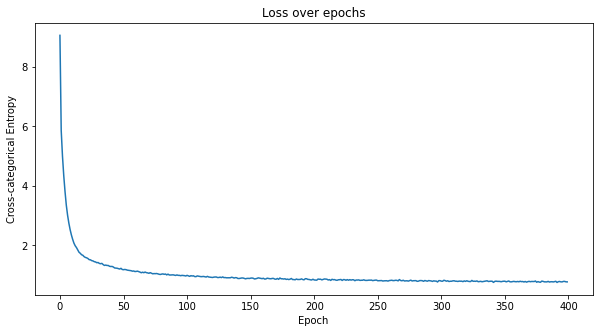

In [102]:
costs = history.history['loss']

plt.figure(figsize = (10,5))

plt.plot(costs)
plt.xlabel('Epoch')
plt.ylabel('Cross-categorical Entropy')
plt.title('Loss over epochs')

plt.show()

# Results

In [108]:
predictions = model.predict_classes(X_test)

In [111]:
#Counts of predicted classes:

np.bincount(predictions)

array([268, 265, 231, 221, 224, 256, 217, 278, 302, 238], dtype=int64)

# Save and Load models and weights

## Save

In [ ]:
model_json = model.to_json()
with open('model.json', 'w') as local_file:
    local_file.write(model_json)

model.save_weights('model.h5')

## Load

In [ ]:
from keras.models import model_from_json


# load json and create model
with open('model.json', 'r') as json_file:
    loaded_model_json = json_file.read()

    
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model.h5")



In [ ]:
#Compile loaded model to continue working with it

loaded_model.compile() #etc.

© 2020 Institute of Data